<a href="https://colab.research.google.com/github/rman1061/Avocado/blob/main/Copy_of_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PARP 116
import pandas as pd
# load data file
df = pd.read_csv("/content/PARP 116.txt",sep="\t")
df

,A,B,C,D,E,F,G,H
0,0.050156,0.072669,0.077729,0.199264,0.049406,0.028662,0.119538,0.095619
1,0.025154,0.047002,0.029990,0.154870,0.013190,0.045632,0.065716,0.025977
2,0.065737,0.069052,0.020719,0.201102,0.011822,0.041233,0.107815,0.015245


In [ ]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

#A = vehicle
#B = 0.01
#C = 0.1
#D= 0.5
#E= 1
#F= 5
#G = 10
#H = 50

In [ ]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns


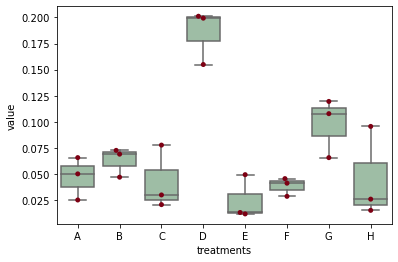

In [ ]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

11.861776948817129 2.799841208469811e-05


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.056779,7.0,11.861777,0.000028
Residual,0.010941,16.0,NaN,NaN


In [ ]:
pip install bioinfokit

     |████████████████████████████████| 92kB 2.4MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-cp37-none-any.whl size=56008 sha256=e55d9a7e9e18414fdd7ef55355ba84cfc7e7268c0a0b19a70a74650b7288b568
  Stored in directory: /root/.cache/pip/wheels/43/cf/aa/4a4fe54a3edb663ee7bd9b245bd946506c8bd4b99f4ae00507
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=46cffcda647aaeea24dfbe095f91b0072c935221c824fa0391a097fe962c8dcd
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [ ]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),7.0,0.056779,0.008111,11.861777,0.000028
Residual,16.0,0.010941,0.000684,NaN,NaN


In [ ]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat

In [ ]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()

In [ ]:
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.015892,-0.058034,0.089818,1.052610,0.900000
1,A,C,0.004202,-0.069724,0.078128,0.278351,0.900000
2,A,D,0.138063,0.064137,0.211989,9.144721,0.001000
3,A,E,0.022210,-0.051716,0.096136,1.471073,0.900000
4,A,F,0.008506,-0.065420,0.082432,0.563433,0.900000
5,A,G,0.050674,-0.023252,0.124600,3.356460,0.315978
6,A,H,0.001402,-0.072524,0.075328,0.092871,0.900000
7,B,C,0.020094,-0.053832,0.094020,1.330961,0.900000
8,B,D,0.122171,0.048245,0.196097,8.092111,0.001000
9,B,E,0.038102,-0.035824,0.112028,2.523683,0.623617


In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt


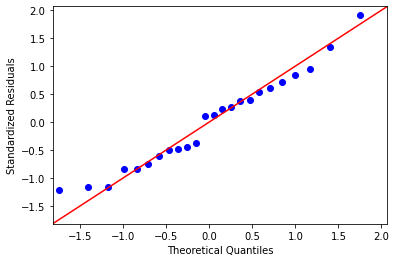

In [ ]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

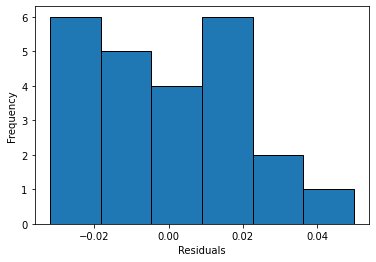

In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.2638
1,Degrees of freedom (Df),7.0000
2,p value,0.9594


In [ ]:
#ERBETA
import pandas as pd
# load data file
df = pd.read_csv("/content/ERBETA.txt", sep="\t")
df

,A,B,C,D,E,F,G,H
0,0.790500,1.185471,1.329677,1.305471,0.897504,0.751024,0.873591,1.182036
1,0.684571,1.272870,1.432498,1.228470,0.739809,0.595011,0.808474,1.237052
2,0.734282,1.127258,1.246390,1.006808,0.689574,0.725795,1.089279,1.138708


In [ ]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

In [ ]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns

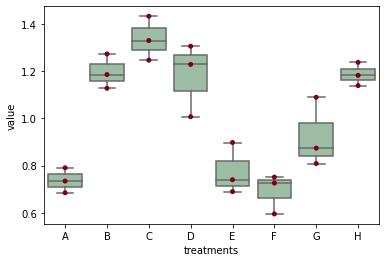

In [ ]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

17.9942143838955 1.776572164655396e-06


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),1.318338,7.0,17.994214,0.000002
Residual,0.167462,16.0,NaN,NaN


In [ ]:
pip install bioinfokit

     |████████████████████████████████| 92kB 3.6MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-cp37-none-any.whl size=56008 sha256=2f239fc556f8d2c5e6c145e0650c3d7f29cb6c4aeb318d9fba2235c96985eb4c
  Stored in directory: /root/.cache/pip/wheels/43/cf/aa/4a4fe54a3edb663ee7bd9b245bd946506c8bd4b99f4ae00507
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=4469dc40fe7a8cd7a73ff87411597867ffd75e178adeaaf73e0bb25f43ed9a04
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [ ]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),7.0,1.318338,0.188334,17.994214,0.000002
Residual,16.0,0.167462,0.010466,NaN,NaN


In [ ]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.458749,0.169530,0.747968,7.766724,0.001000
1,A,C,0.599738,0.310519,0.888956,10.153692,0.001000
2,A,D,0.443799,0.154580,0.733018,7.513614,0.001404
3,A,E,0.039178,-0.250041,0.328397,0.663295,0.900000
4,A,F,0.045841,-0.243378,0.335060,0.776095,0.900000
5,A,G,0.187331,-0.101888,0.476550,3.171550,0.379864
6,A,H,0.449481,0.160262,0.738700,7.609818,0.001235
7,B,C,0.140989,-0.148230,0.430207,2.386968,0.674787
8,B,D,0.014950,-0.274269,0.304169,0.253109,0.900000
9,B,E,0.419571,0.130352,0.708790,7.103428,0.002450


In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

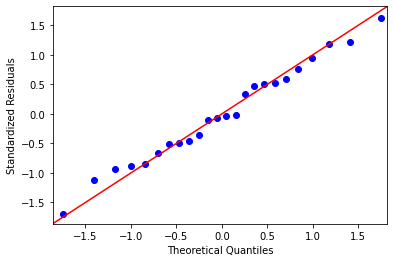

In [ ]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

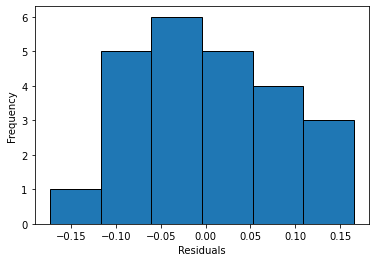

In [ ]:
#histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
 # standardized residuals lie around the 45-degree line, this suggests that the residuals are approximately normally distributed
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
#Used ZS


0.9841324090957642 0.9582085013389587


In [ ]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

3.9671292401805873 0.7835556123389469


In [ ]:
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),3.9671
1,Degrees of freedom (Df),7.0000
2,p value,0.7836


In [ ]:
# the p value (0.7836) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.



In [ ]:
#MNSOD

import pandas as pd
# load data file
df = pd.read_csv("/content/MNSOD.txt", sep="\t")
df

,A,B,C,D,E,F,G,H
0,0.343390,0.518813,0.512824,0.503131,0.593912,0.681530,0.667040,0.679557
1,0.405961,0.550234,0.468603,0.566593,0.596542,0.676215,0.723106,0.734341
2,0.227852,0.337555,0.290688,0.487873,0.467238,0.576175,0.718127,0.542092


In [ ]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

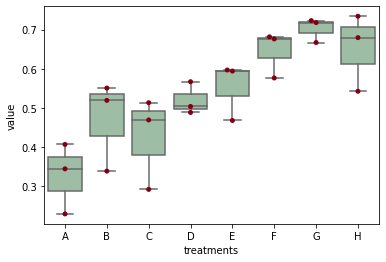

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

6.95016752439643 0.0006727464155025148


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.344628,7.0,6.950168,0.000673
Residual,0.113339,16.0,NaN,NaN


In [ ]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),7.0,0.344628,0.049233,6.950168,0.000673
Residual,16.0,0.113339,0.007084,NaN,NaN


In [ ]:
#The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.


In [ ]:
#To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

In [ ]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.143133,-0.094802,0.381067,2.945581,0.465372
1,A,C,0.098304,-0.139631,0.336238,2.023033,0.810998
2,A,D,0.193465,-0.044470,0.431399,3.981377,0.158806
3,A,E,0.226830,-0.011105,0.464764,4.668008,0.067579
4,A,F,0.318905,0.080971,0.556840,6.562869,0.005135
5,A,G,0.377023,0.139089,0.614958,7.758898,0.001009
6,A,H,0.326262,0.088328,0.564197,6.714273,0.004172
7,B,C,0.044829,-0.193106,0.282763,0.922548,0.900000
8,B,D,0.050332,-0.187603,0.288266,1.035797,0.900000
9,B,E,0.083697,-0.154238,0.321631,1.722427,0.900000


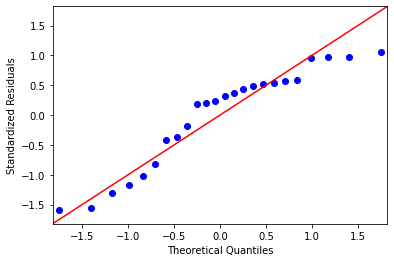

In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

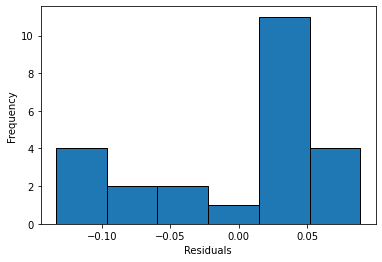

In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.2926
1,Degrees of freedom (Df),7.0000
2,p value,0.9471


In [ ]:
import pandas as pd
# load data file
df = pd.read_csv("/content/CASPASE 3.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

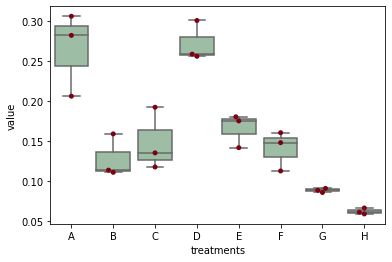

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

20.399419853408123 7.46272669040328e-07


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.119942,7.0,20.39942,7.462727e-07
Residual,0.013439,16.0,NaN,NaN


In [ ]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),7.0,0.119942,0.017135,20.39942,7.462727e-07
Residual,16.0,0.013439,0.000840,NaN,NaN


In [ ]:
#p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary



,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.137271,0.055339,0.219204,8.203761,0.001000
1,A,C,0.116694,0.034761,0.198627,6.973990,0.002923
2,A,D,0.007064,-0.074869,0.088996,0.422150,0.900000
3,A,E,0.099285,0.017352,0.181218,5.933578,0.012230
4,A,F,0.124725,0.042792,0.206658,7.453949,0.001521
5,A,G,0.176922,0.094989,0.258854,10.573382,0.001000
6,A,H,0.203183,0.121251,0.285116,12.142841,0.001000
7,B,C,0.020577,-0.061355,0.102510,1.229771,0.900000
8,B,D,0.144335,0.062403,0.226268,8.625911,0.001000
9,B,E,0.037986,-0.043946,0.119919,2.270183,0.718495


In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

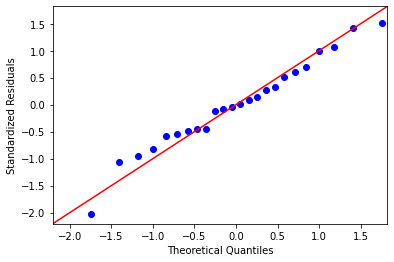

In [ ]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

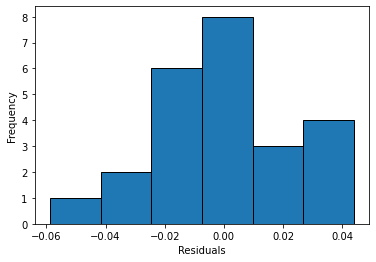

In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9813075661659241 0.9186723232269287


In [ ]:
# distribution looks approximately normal and suggests that residuals are approximately normally distributed

In [ ]:
#Shapiro-Wilk test can be used to check the normal distribution of residuals. 

In [ ]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9813075661659241 0.9186723232269287


In [ ]:
#p value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

In [ ]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

#Bartlett’s test to check the Homogeneity of variances

14.281376834534273 0.04639721448262891


In [ ]:
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),14.2814
1,Degrees of freedom (Df),7.0000
2,p value,0.0464


In [ ]:
#As the p value (0.0464) is significant, we do not reject null hypothesis and have to conclude that treatments have unequal variances.


In [ ]:
import pandas as pd
# load data file
df = pd.read_csv("/content/new ERBETA.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

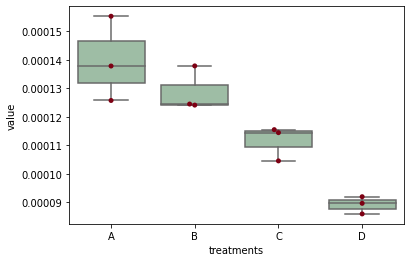

In [ ]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

20.079011634404182 8.332812098986194e-07


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),4.360312e-09,3.0,17.746599,0.000678
Residual,6.551959e-10,8.0,NaN,NaN


In [ ]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.000011,-0.000013,0.000034,2.065421,0.500599
1,A,C,0.000028,0.000004,0.000052,5.379664,0.021713
2,A,D,0.000050,0.000027,0.000074,9.647305,0.001000
3,B,C,0.000017,-0.000006,0.000041,3.314243,0.166981
4,B,D,0.000040,0.000016,0.000063,7.581884,0.003005
5,C,D,0.000022,-0.000001,0.000046,4.267641,0.064912


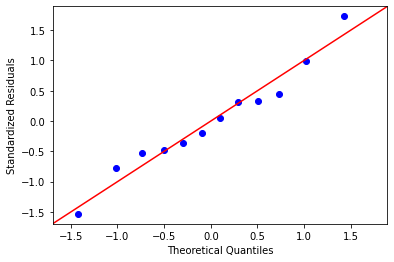

In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

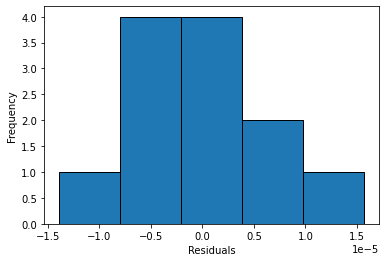

In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.977942705154419 0.9741113185882568


In [ ]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

16.511819170079004 0.020830276159776912


In [ ]:
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),3.7831
1,Degrees of freedom (Df),3.0000
2,p value,0.2859


In [ ]:
#As the p value (0.2859) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.


In [ ]:
#This concludes PC3 for now

In [4]:
#PARP 116
import pandas as pd
# load data file
df = pd.read_csv("/content/89 116 RM.txt",sep="\t")
df

,A,B,C,D,E,F,G,H
0,0.253400,0.073264,0.397498,0.414608,0.346873,0.068047,0.101081,0.121036
1,0.184237,-0.001871,0.247387,0.368955,0.346498,0.026111,0.077423,0.082777
2,0.253164,-0.003519,0.298633,0.589402,0.452951,0.015647,0.197935,0.080518


In [5]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

#A = vehicle
#B = 0.01
#C = 0.1
#D= 0.5
#E= 1
#F= 5
#G = 10
#H = 50

In [6]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns

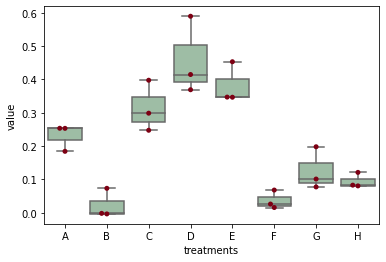

In [7]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [8]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

20.124841399014453 8.201638289577504e-07


In [10]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.563552,7.0,20.124841,8.201638e-07
Residual,0.064006,16.0,NaN,NaN


In [12]:
pip install bioinfokit

     |████████████████████████████████| 92kB 2.6MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-cp37-none-any.whl size=56011 sha256=bdb89e0d8ce239889c1756c77eee7ebea475790a6d8cafa9080b0542fc995677
  Stored in directory: /root/.cache/pip/wheels/43/cf/aa/4a4fe54a3edb663ee7bd9b245bd946506c8bd4b99f4ae00507
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7097 sha256=678ddcd92b65b206502f2bd6a1777b15e0f4457f8dba8e877e271499baf8adab
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [13]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),7.0,0.563552,0.080507,20.124841,8.201638e-07
Residual,16.0,0.064006,0.004000,NaN,NaN


In [14]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat

In [15]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()

In [16]:
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.207642,0.028837,0.386448,5.686234,0.017183
1,A,C,0.084239,-0.094566,0.263044,2.306864,0.704766
2,A,D,0.227388,0.048582,0.406193,6.226958,0.008159
3,A,E,0.151840,-0.026965,0.330646,4.158110,0.128147
4,A,F,0.193665,0.014860,0.372471,5.303477,0.028977
5,A,G,0.104788,-0.074018,0.283593,2.869580,0.494157
6,A,H,0.135490,-0.043315,0.314295,3.710362,0.216847
7,B,C,0.291881,0.113076,0.470687,7.993098,0.001000
8,B,D,0.435030,0.256225,0.613836,11.913192,0.001000
9,B,E,0.359483,0.180677,0.538288,9.844344,0.001000


In [17]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

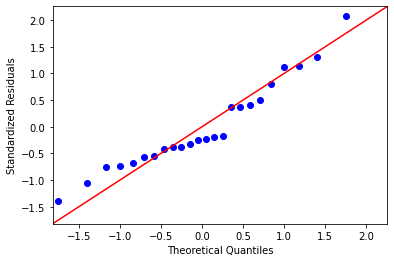

In [18]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

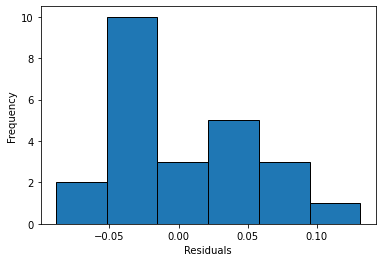

In [19]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [21]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9433070421218872 0.19321784377098083


In [22]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'])
print(w, pvalue)

2.4663319348044768 0.4814063954426455


In [23]:
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),6.3916
1,Degrees of freedom (Df),7.0000
2,p value,0.4948


In [24]:
#As the p value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.



In [25]:
import pandas as pd
# load data file
df = pd.read_csv("/content/89 actin RM.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 

In [26]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

#A = vehicle
#B = 0.01
#C = 0.1
#D= 0.5
#E= 1
#F= 5
#G = 10
#H = 50

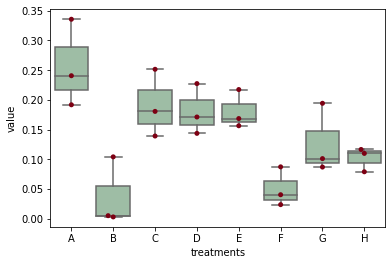

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [29]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

6.882281108186796 0.0007099522216519043


In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.118436,7.0,6.882281,0.00071
Residual,0.039334,16.0,NaN,NaN


In [32]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),7.0,0.118436,0.016919,6.882281,0.00071
Residual,16.0,0.039334,0.002458,NaN,NaN


In [33]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.218599,0.078429,0.358769,7.636274,0.001188
1,A,C,0.065593,-0.074577,0.205764,2.291364,0.710568
2,A,D,0.075282,-0.064888,0.215453,2.629826,0.583892
3,A,E,0.075236,-0.064934,0.215406,2.628213,0.584496
4,A,F,0.205566,0.065396,0.345736,7.181003,0.002203
5,A,G,0.128573,-0.011597,0.268743,4.491421,0.084844
6,A,H,0.154193,0.014023,0.294363,5.386386,0.025889
7,B,C,0.153005,0.012835,0.293175,5.344910,0.027391
8,B,D,0.143316,0.003146,0.283487,5.006447,0.043218
9,B,E,0.143363,0.003192,0.283533,5.008061,0.043123


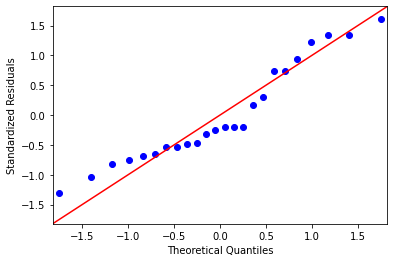

In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

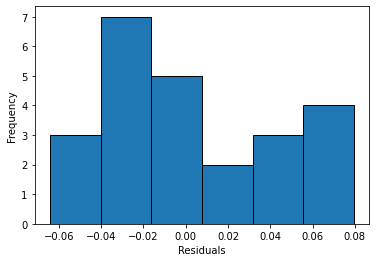

In [35]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [36]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9196529984474182 0.05738646164536476


In [38]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

3.550973327249566 0.8297973259031742


In [39]:
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),3.5510
1,Degrees of freedom (Df),7.0000
2,p value,0.8298


In [40]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.2699
1,Degrees of freedom (Df),7.0000
2,p value,0.9570


In [41]:
import pandas as pd
# load data file
df = pd.read_csv("/content/116 actin RM.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 

In [42]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

#A = vehicle
#B = 0.01
#C = 0.1
#D= 0.5
#E= 1
#F= 5
#G = 10
#H = 50

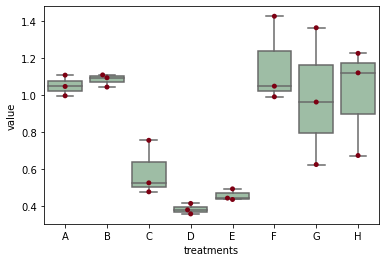

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [44]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

7.471143798922756 0.00045011155331178094


In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [46]:
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),2.011138,7.0,7.471144,0.00045
Residual,0.615285,16.0,NaN,NaN


In [47]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),7.0,2.011138,0.287305,7.471144,0.00045
Residual,16.0,0.615285,0.038455,NaN,NaN


In [48]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.031807,-0.522572,0.586186,0.280934,0.900000
1,A,C,0.464492,-0.089887,1.018871,4.102614,0.137145
2,A,D,0.666888,0.112509,1.221268,5.890274,0.012981
3,A,E,0.593405,0.039026,1.147784,5.241233,0.031527
4,A,F,0.104948,-0.449431,0.659327,0.926950,0.900000
5,A,G,0.066647,-0.487732,0.621026,0.588658,0.900000
6,A,H,0.043878,-0.510502,0.598257,0.387547,0.900000
7,B,C,0.496299,-0.058080,1.050678,4.383549,0.097056
8,B,D,0.698695,0.144316,1.253075,6.171208,0.008811
9,B,E,0.625212,0.070833,1.179591,5.522167,0.021512


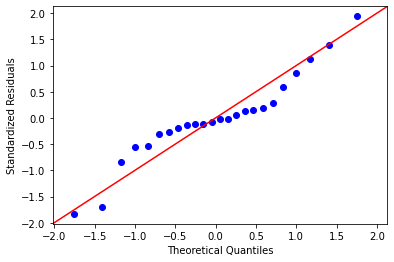

In [49]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

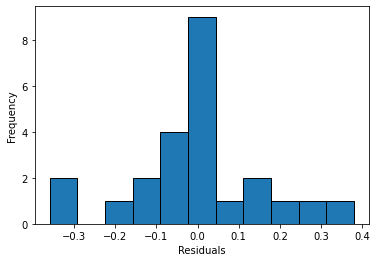

In [50]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [51]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9397261142730713 0.160846546292305


In [52]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

19.550484776256265 0.006627024386857362


In [53]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),19.5505
1,Degrees of freedom (Df),7.0000
2,p value,0.0066


In [54]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.1486
1,Degrees of freedom (Df),7.0000
2,p value,0.3830


In [1]:
import pandas as pd
# load data file
df = pd.read_csv("/content/erbeta actin RM.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 

In [2]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

#A = vehicle
#B = 0.01
#C = 0.1
#D= 0.5
#E= 1
#F= 5
#G = 10
#H = 50

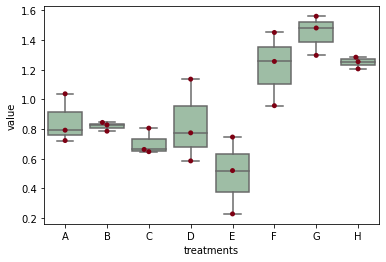

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [4]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

9.280083866783794 0.00012762013994385615


In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),2.140400,7.0,9.280084,0.000128
Residual,0.527187,16.0,NaN,NaN


In [8]:
pip install bioinfokit

     |████████████████████████████████| 92kB 4.5MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-cp37-none-any.whl size=56011 sha256=eff5aa9538ff3039e34a64bbcd12e773d9451d05bc06a40d0319d484c3ba1a7a
  Stored in directory: /root/.cache/pip/wheels/43/cf/aa/4a4fe54a3edb663ee7bd9b245bd946506c8bd4b99f4ae00507
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7097 sha256=784a0c452bd3ea78a2c44362df75ff83dbb69785dd1340305ca0fc3e0b92763a
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [9]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.031537,-0.481621,0.544695,0.300923,0.900000
1,A,C,0.145454,-0.367704,0.658612,1.387918,0.900000
2,A,D,0.018833,-0.494325,0.531991,0.179704,0.900000
3,A,E,0.352804,-0.160354,0.865962,3.366450,0.312838
4,A,F,0.370619,-0.142539,0.883777,3.536436,0.262144
5,A,G,0.595278,0.082120,1.108436,5.680129,0.017329
6,A,H,0.397077,-0.116082,0.910235,3.788893,0.198401
7,B,C,0.113917,-0.399241,0.627075,1.086994,0.900000
8,B,D,0.012704,-0.500454,0.525862,0.121219,0.900000
9,B,E,0.321268,-0.191890,0.834426,3.065526,0.419556


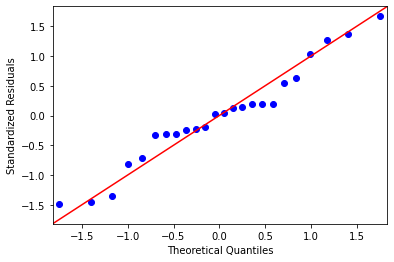

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

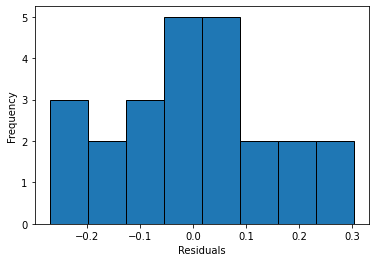

In [11]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [12]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9593644142150879 0.4257867634296417


In [13]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

11.170138134891252 0.13136793378959763


In [14]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),11.1701
1,Degrees of freedom (Df),7.0000
2,p value,0.1314


In [15]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.9489
1,Degrees of freedom (Df),7.0000
2,p value,0.4980


In [16]:
import pandas as pd
# load data file
df = pd.read_csv("/content/MnSOD actin RM.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 

In [17]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

#A = vehicle
#B = 0.01
#C = 0.1
#D= 0.5
#E= 1
#F= 5
#G = 10
#H = 50

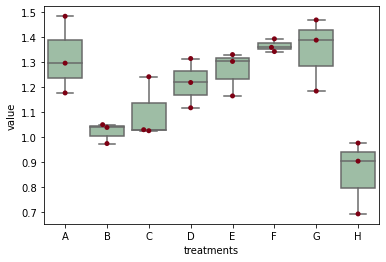

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [19]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

7.557275839200127 0.000421952920256604


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.676495,7.0,7.557276,0.000422
Residual,0.204607,16.0,NaN,NaN


In [22]:
pip install bioinfokit

In [23]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.297785,-0.021905,0.617475,4.561029,0.077623
1,A,C,0.219787,-0.099903,0.539477,3.366373,0.312862
2,A,D,0.101970,-0.217721,0.421660,1.561820,0.900000
3,A,E,0.052773,-0.266918,0.372463,0.808292,0.900000
4,A,F,0.046101,-0.273590,0.365791,0.706102,0.900000
5,A,G,0.028294,-0.291396,0.347984,0.433369,0.900000
6,A,H,0.461076,0.141386,0.780767,7.062084,0.002590
7,B,C,0.077998,-0.241692,0.397688,1.194656,0.900000
8,B,D,0.195815,-0.123875,0.515506,2.999210,0.444873
9,B,E,0.245012,-0.074678,0.564703,3.752738,0.206739


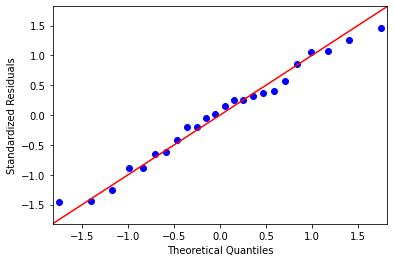

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

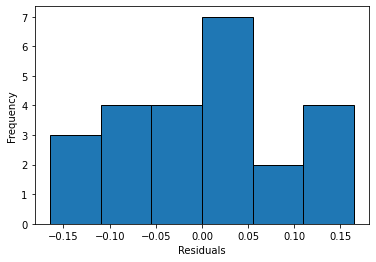

In [25]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [26]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9705860614776611 0.6814762353897095


In [27]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

6.550770299290614 0.47710013722174494


In [28]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),6.5508
1,Degrees of freedom (Df),7.0000
2,p value,0.4771


In [29]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.4411
1,Degrees of freedom (Df),7.0000
2,p value,0.8619


In [30]:
import pandas as pd
# load data file
df = pd.read_csv("/content/caspase 3 RM.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 

In [31]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

#A = vehicle
#B = 0.01
#C = 0.1
#D= 0.5
#E= 1
#F= 5
#G = 10
#H = 50

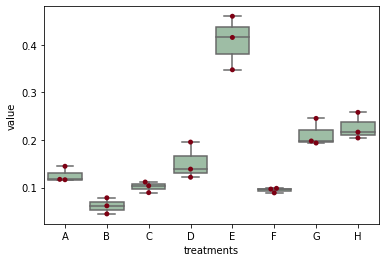

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [33]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

41.79912109453186 4.121795338059163e-09


In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [35]:
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.257582,7.0,41.799121,4.121795e-09
Residual,0.014085,16.0,NaN,NaN


In [36]:
pip install bioinfokit

In [37]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.064615,-0.019264,0.148495,3.771998,0.202264
1,A,C,0.024586,-0.059293,0.108465,1.435229,0.900000
2,A,D,0.025859,-0.058020,0.109738,1.509538,0.900000
3,A,E,0.281727,0.197848,0.365606,16.446143,0.001000
4,A,F,0.031484,-0.052395,0.115363,1.837909,0.880284
5,A,G,0.086202,0.002323,0.170081,5.032148,0.041760
6,A,H,0.100196,0.016316,0.184075,5.849029,0.013740
7,B,C,0.040030,-0.043850,0.123909,2.336768,0.693575
8,B,D,0.090474,0.006595,0.174353,5.281535,0.029851
9,B,E,0.346343,0.262464,0.430222,20.218141,0.001000


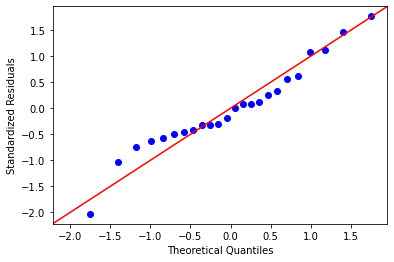

In [38]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

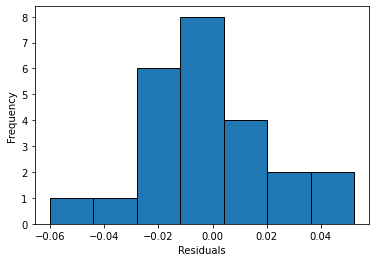

In [39]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [40]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9654399752616882 0.5568913221359253


In [41]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

10.296692982750253 0.17237430146987226


In [42]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),10.2967
1,Degrees of freedom (Df),7.0000
2,p value,0.1724


In [43]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.8059
1,Degrees of freedom (Df),7.0000
2,p value,0.5947


In [44]:
import pandas as pd
# load data file
df = pd.read_csv("/content/ccaspase 3 actin RM.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 

In [45]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

#A = vehicle
#B = 0.01
#C = 0.1
#D= 0.5
#E= 1
#F= 5
#G = 10
#H = 50

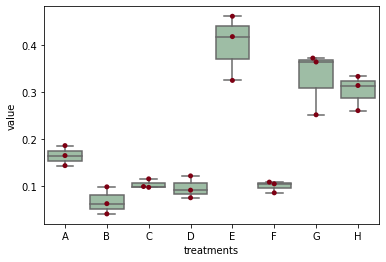

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [47]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

30.909180839515802 3.8326815726051086e-08


In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [49]:
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.350174,7.0,30.909181,3.832682e-08
Residual,0.025895,16.0,NaN,NaN


In [50]:
pip install bioinfokit

In [51]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.097636,-0.016095,0.211367,4.203600,0.121666
1,A,C,0.060953,-0.052778,0.174683,2.624242,0.585983
2,A,D,0.068836,-0.044895,0.182567,2.963660,0.458469
3,A,E,0.236627,0.122897,0.350358,10.187702,0.001000
4,A,F,0.065281,-0.048449,0.179012,2.810614,0.516228
5,A,G,0.164536,0.050805,0.278267,7.083901,0.002514
6,A,H,0.137816,0.024085,0.251547,5.933512,0.012232
7,B,C,0.036683,-0.077047,0.150414,1.579359,0.900000
8,B,D,0.028800,-0.084931,0.142531,1.239940,0.900000
9,B,E,0.334263,0.220533,0.447994,14.391302,0.001000


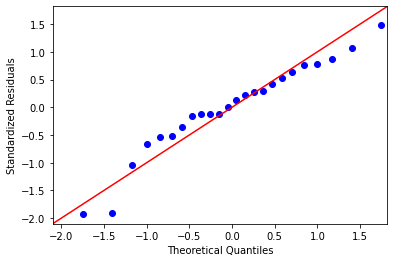

In [52]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

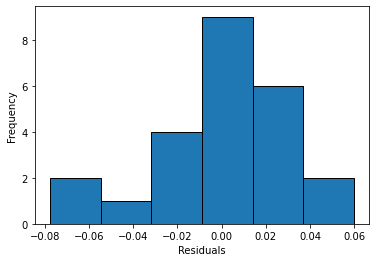

In [53]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [54]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9486612677574158 0.2534013092517853


In [55]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

10.353851442332992 0.1693920018707832


In [56]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),10.3539
1,Degrees of freedom (Df),7.0000
2,p value,0.1694


In [57]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.6496
1,Degrees of freedom (Df),7.0000
2,p value,0.7099


In [60]:
import pandas as pd
# load data file
df = pd.read_csv("/content/totalcaspase3actin RMani.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 

In [61]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

#A = vehicle
#B = 0.01
#C = 0.1
#D= 0.5
#E= 1
#F= 5
#G = 10
#H = 50

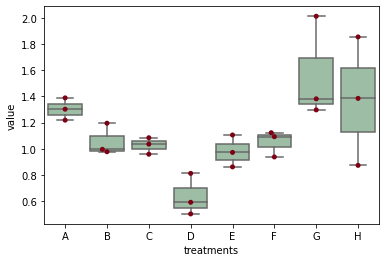

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [63]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

4.127841709699837 0.008962089394619841


In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [65]:
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),1.694944,7.0,4.127842,0.008962
Residual,0.938543,16.0,NaN,NaN


In [66]:
pip install bioinfokit

In [67]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.246991,-0.437702,0.931683,1.766338,0.900000
1,A,C,0.277002,-0.407690,0.961695,1.980966,0.826742
2,A,D,0.667685,-0.017008,1.352378,4.774909,0.058739
3,A,E,0.323288,-0.361405,1.007981,2.311973,0.702853
4,A,F,0.252313,-0.432380,0.937005,1.804398,0.892823
5,A,G,0.260199,-0.424494,0.944892,1.860799,0.871716
6,A,H,0.067612,-0.617081,0.752305,0.483523,0.900000
7,B,C,0.030012,-0.654681,0.714705,0.214628,0.900000
8,B,D,0.420694,-0.263998,1.105387,3.008571,0.441290
9,B,E,0.076297,-0.608396,0.760990,0.545635,0.900000


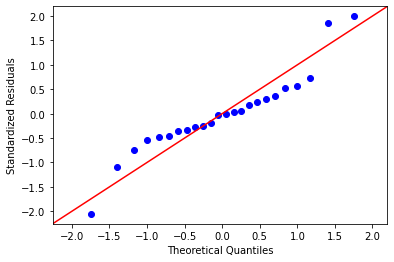

In [68]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

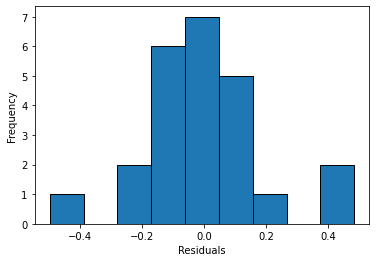

In [69]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [70]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9290158152580261 0.09267274290323257


In [71]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

13.11911990488916 0.06925870000300417


In [72]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),13.1191
1,Degrees of freedom (Df),7.0000
2,p value,0.0693


In [73]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.0703
1,Degrees of freedom (Df),7.0000
2,p value,0.4252
